<a href="https://colab.research.google.com/github/Lavanya8484/Celebal_Summer_Internship/blob/main/Week-4/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [5]:
# loading the dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [6]:
# Basic Info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Data types and null values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Percentage of missing data
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print("\nMissing Value Summary:\n", missing_df[missing_df["Missing Count"] > 0])



Missing Value Summary:
           Missing Count  Missing %
Age                 177  19.865320
Cabin               687  77.104377
Embarked              2   0.224467


In [9]:
# Summary statistics
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


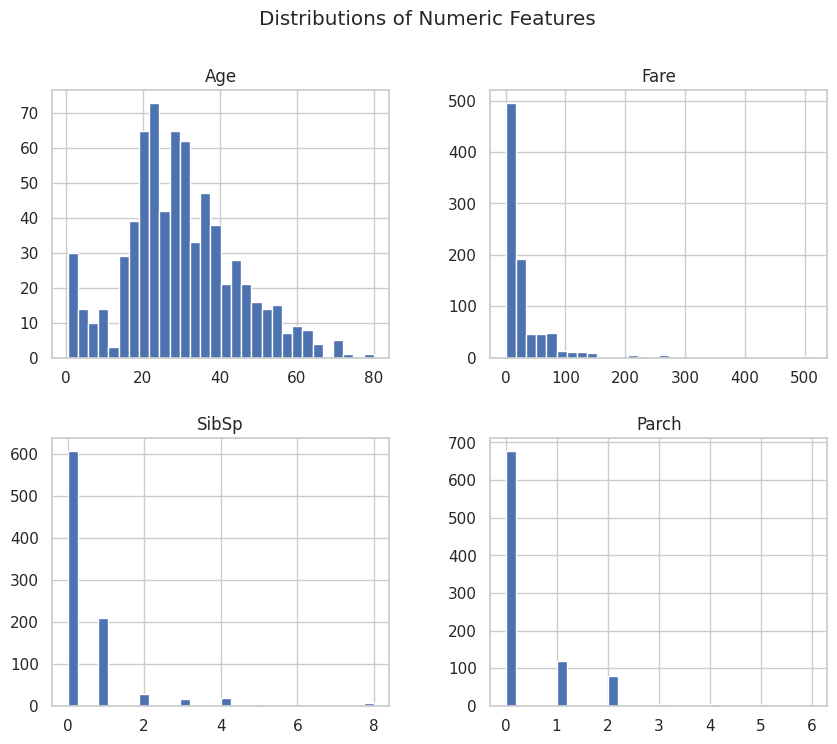

In [10]:
# Distribution of numeric features
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols].hist(bins=30, figsize=(10, 8))
plt.suptitle("Distributions of Numeric Features")
plt.show()

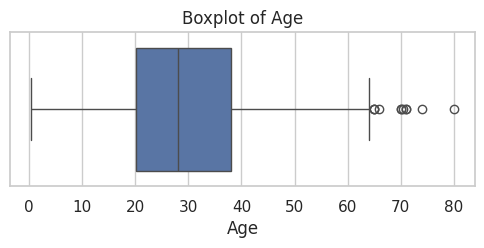

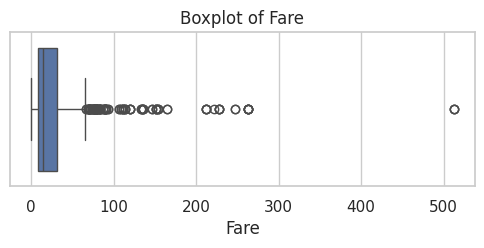

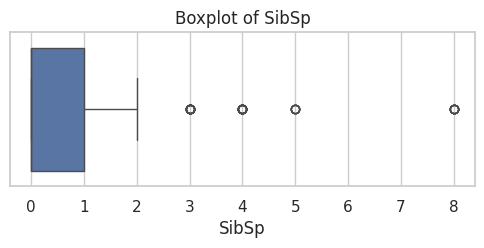

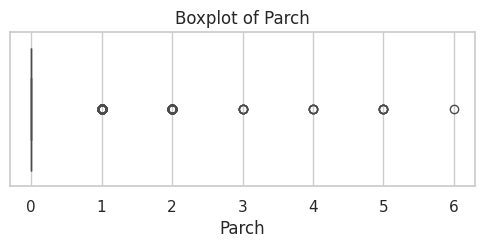

In [14]:
# Box plots for numeric features
for col in numeric_cols:
   plt.figure(figsize=(6, 2))
   sns.boxplot(x=col, data=df)
   plt.title(f'Boxplot of {col}')
plt.show()

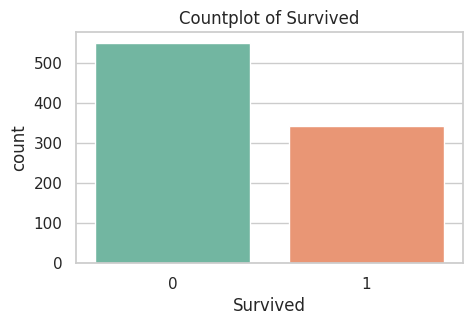

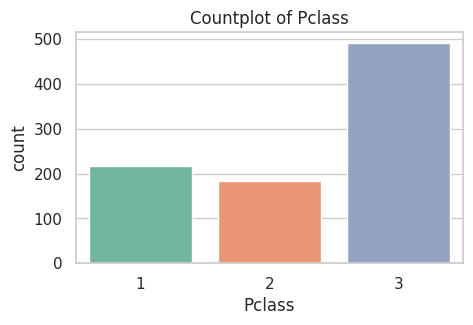

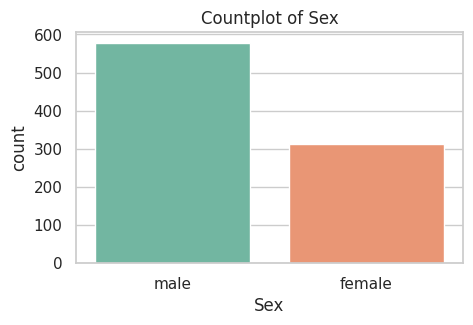

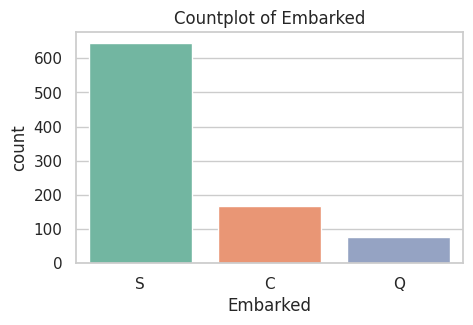

In [17]:
# Count plots for categorical features
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
   plt.figure(figsize=(5, 3))
   sns.countplot(x=col, data=df, palette='Set2')
   plt.title(f'Countplot of {col}')
   plt.show()

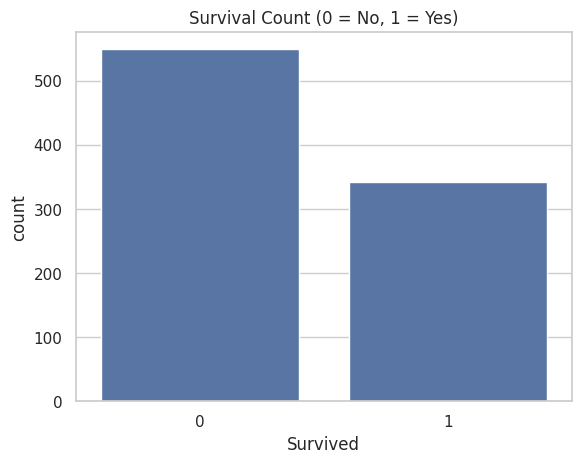

In [19]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

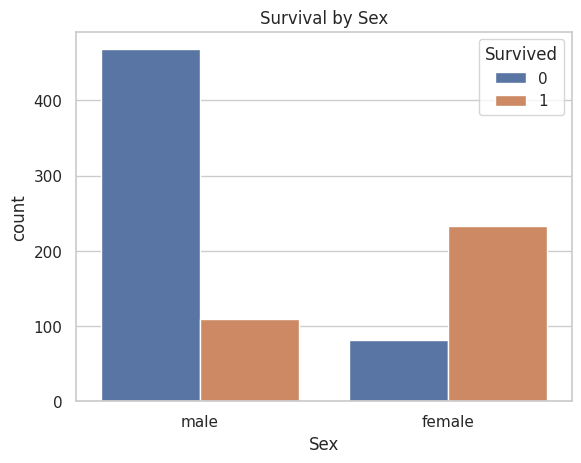

In [20]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

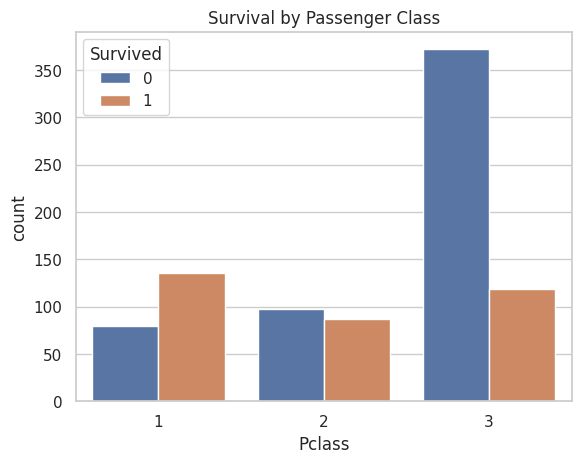

In [22]:
# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

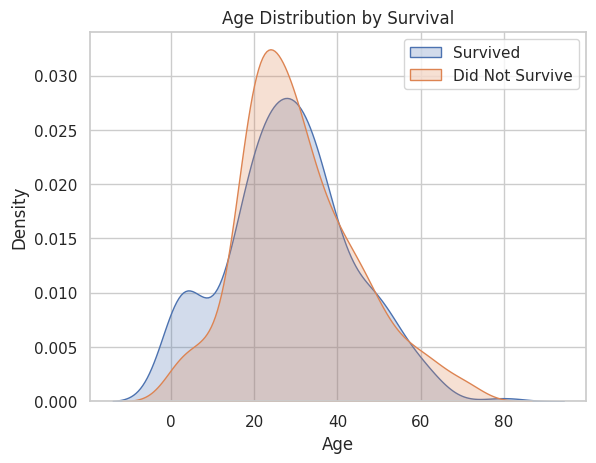

In [24]:
# Age distribution by survival
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

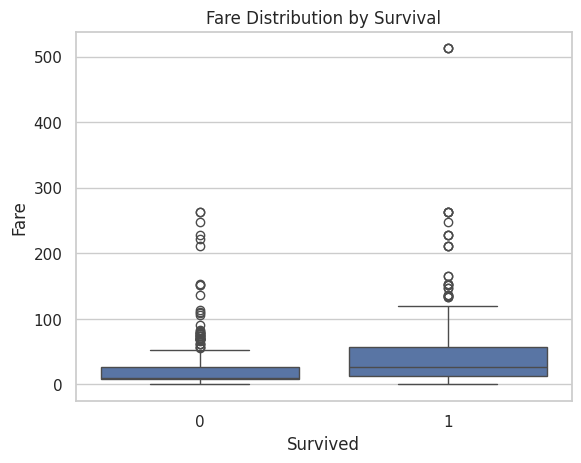

In [25]:
# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

In [28]:
# Outlier detection using IQR
def detect_outliers(col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  return df[(df[col] < lower) | (df[col] > upper)]

out_fare = detect_outliers('Fare')
print("Number of Fare outliers:", len(out_fare))

out_age = detect_outliers('Age')
print("Number of Age outliers:", len(out_age))

Number of Fare outliers: 116
Number of Age outliers: 11


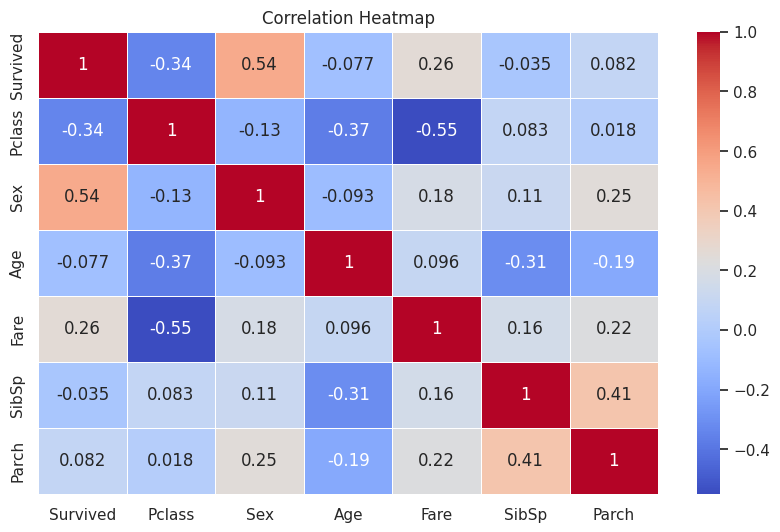

In [29]:
# Correlation matrix
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
corr_matrix = df_corr[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()